In [38]:
import numpy as np
import scipy.interpolate as snt
import matplotlib.pyplot as plt
import scipy.special as sc
from scipy import stats
import scipy.integrate as spi

BC information taken from http://www.bccdc.ca/health-info/diseases-conditions/covid-19/data.

Information for Canada (nationwide), US, Korea, and India taken from https://www.worldometers.info/coronavirus/#countries.

In [39]:
# Infection cases per day/month in different regions. Will be updated in time.
# Days start on the 1st of each month.

cvbc05 = [23,33,21,16,24,29,21,14,8,17,10,13,16,14,21,8,11,5,19,11,22,12,4,9,8,7,10,5,11,9,16]
# BC cases in May.

cvbc06 = [4,23,2,4,12,7,9,10,14,12,17,14,14,9,11,20,9,5,9,6,17,11,12,21,11,9,13,3,12,17]
# BC cases in June.

cvbc07 = [10,9,12,16,7,10,19,18,22,25,22,20,13,18,24,33,44,19,29,33,34,32,30,30,21,22,23,47,26,39,52]
# BC cases in July.

cvbc08 = [29,48,27,44,45,47,51,38,45,46]
# BC cases in August.

cvbcm = [1,8,1048,1087,447,337,sum(cvbc07)]
# Monthly BC cases starting from January.

cvbcall = cvbc05 + cvbc06 + cvbc07 + cvbc08
# An amalgamation of all the BC cases given.

##################################################################################################################

cvus07 = [52397,57545,59636,49994,46074,50789,55885,62325,61599,72320,62042,58641,65816,66013,72038,73427,75026,
         63242,65312,62940,67507,72000,69920,78446,68204,56581,61820,65069,65323,68585,72436]
# US cases in July.

cvus08 = [58617,49699,48712,54648,55148,58894,63413,56114,47971,49800,54519]
# US cases in August.

cvusmk = [0.007, 0.017,188.7,1073-188.7,1799-1073,2636-1799,sum(cvus07)/1000]
# Monthly US cases starting from February. Counted in thousands.

##################################################################################################################

cvin07 = [19428,21948,22721,24015,23932,22510,23135,25571,25790,27761,27755,
          29108,28179,29842,32682,35468,34820,37407,40243,36810,39168,
          45599,48446,48892,48472,50525,46484,49632,52249,54966,57704]
# India cases in July.

cvin08 = [54865,52783,50629,51282,56626,62170,61455,65156,62117,53016,61252]
# India cases in August.

##################################################################################################################

cvca07 = [67,501,319,226,219,399,232,267,371,321,221,243,565,331,343,435,405,330,339,786,573,543,432,534,350,355,
         686,397,476,329,513]
# Canada cases in July.

cvca08 = [287,285,147,761,395,374,424,236,230,681,289]
# Canada cases in August.

##################################################################################################################

cvkr07 = [50,54,63,63,61,46,44,62,50,45,35,44,62,33,39,61,60,39,34,26,45,63,59,41,113,58,25,28,48,18,36]
# South Korea cases in July.

cvkr08 = [31,30,23,34,33,43,20,43,36,28,34]
# South Korea cases in August.

In [40]:
def avg(x):
    
# Return the average number of cases for a certain list. x is the list.

    return round(np.mean(x))

In [41]:
def stdev(x):

# Return the standard devation (a measure of spread) of the cases for a certain list. x is the list.

    return round(np.std(x),1)

In [42]:
def last_tp(x):
    
# Return the number of cases for the last time period. x is the list.

    return x[-1]

In [43]:
def next_tp(x):
    
# Return a rough estimate of the number of cases that will occur on the next time period given the past data. 
# x is the list.

        t = np.linspace(1,len(x),len(x))

        slope, intercept, r_value, p_value, std_err = stats.linregress(t,x)
        
        g = round(x[-1]+slope)
        
        if g<0:
            return int(0)
        else:
            return int(g)

In [44]:
def prob(x,m,n):
    
# Return the probability of the next time period having between m and n cases. x is the list, m is the lower 
# prediction, and n is the higher prediction.
    
    t = np.linspace(1,len(x),len(x))
    slope, intercept, r_value, p_value, std_err = stats.linregress(t,x)
    
    ph = 50*(1+sc.erf((n-x[-1]-slope)/np.sqrt(2*np.std(x)**2)))
    pl = 50*(1+sc.erf((m-x[-1]-slope)/np.sqrt(2*np.std(x)**2)))
    
    return round(ph-pl,2)

In [45]:
def graph_next_tp(x,m,n):
    
# Plot a probability distribution showing the likelihood of having a certain number of cases per time period.
# x is the list, m is the lower prediction, and n is the higher prediction.

    t = np.linspace(1,len(x),len(x))
    slope, intercept, r_value, p_value, std_err = stats.linregress(t,x)
    
    samples = x[-1]+(np.std(x)*np.random.normal(size=1000000))

    bins = np.linspace(m,n,300000)
    histogram, bins = np.histogram(samples, bins=bins, density=True)

    bin_centers = 0.5*(bins[1:] + bins[:-1])

    pdf = stats.norm.pdf(bin_centers,x[-1]+slope,np.std(x))
    


    plt.figure(figsize=(20,10))
    plt.plot(bin_centers, pdf, label="PDF")
    
    if (m-x[-1]-slope)/np.std(x)<=-2 and (n-x[-1]-slope)/np.std(x)>=-2:
        plt.vlines(x[-1]-2*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**4)),colors="g", label="-2 Stdev")
        
        print("-2 Standard Deviations = " + str(round(x[-1]-2*np.std(x)+slope)))

    if (m-x[-1]-slope)/np.std(x)<=-1.5 and (n-x[-1]-slope)/np.std(x)>=-1.5:
        plt.vlines(x[-1]-1.5*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**2.25)),colors="r", 
                   label="-1.5 Stdev")
        print("-1.5 Standard Deviations = " + str(round(x[-1]-1.5*np.std(x)+slope)))
        
    if (m-x[-1]-slope)/np.std(x)<=-1 and (n-x[-1]-slope)/np.std(x)>=-1:
        plt.vlines(x[-1]-np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e)),colors="m", label="-1 Stdev")
        
        print("-1 Standard Deviations = " + str(round(x[-1]-np.std(x)+slope)))
        
    if (m-x[-1]-slope)/np.std(x)<=-0.75 and (n-x[-1]-slope)/np.std(x)>=-0.75:
        plt.vlines(x[-1]-0.75*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**0.5625)),
                   colors="orange", label="-0.75 Stdev")
        
        print("-0.75 Standard Deviations = " + str(round(x[-1]-0.75*np.std(x)+slope)))
        
    if (m-x[-1]-slope)/np.std(x)<=-0.5 and (n-x[-1]-slope)/np.std(x)>=-0.5:
        plt.vlines(x[-1]-0.5*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**0.25)),colors="y", 
                   label="-0.5 Stdev")
        
        print("-0.5 Standard Deviations = " + str(round(x[-1]-0.5*np.std(x)+slope)))
              
    if (m-x[-1]-slope)/np.std(x)<=-0.25 and (n-x[-1]-slope)/np.std(x)>=-0.25:
        plt.vlines(x[-1]-0.25*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**0.0625)),
                   colors="grey", label="-0.25 Stdev")
        
        print("-0.25 Standard Deviations = " + str(round(x[-1]-0.25*np.std(x)+slope)))
    
    if (m-x[-1]-slope)/np.std(x)<=0 and (n-x[-1]-slope)/np.std(x)>=0:
        plt.vlines(x[-1]+slope,0,1/(np.std(x)*np.sqrt(2*np.pi)), label="Next Time Period Prediction")
        
        print("Next Time Period Prediction = " + str(round(x[-1]+slope)))
        
    if (n-x[-1]-slope)/np.std(x)>=0.25 and (m-x[-1]-slope)/np.std(x)<=0.25:
        plt.vlines(x[-1]+0.25*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**0.0625)),
                   colors="grey", label="+0.25 Stdev")
        
        print("+0.25 Standard Deviations = " + str(round(x[-1]+0.25*np.std(x)+slope)))
        
    if (n-x[-1]-slope)/np.std(x)>=0.5 and (m-x[-1]-slope)/np.std(x)<=0.5:
        plt.vlines(x[-1]+0.5*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**0.25)),colors="y", 
                   label="+0.5 Stdev")
        
        print("+0.5 Standard Deviations = " + str(round(x[-1]+0.5*np.std(x)+slope)))
        
    if (n-x[-1]-slope)/np.std(x)>=0.75 and (m-x[-1]-slope)/np.std(x)<=0.75:
        plt.vlines(x[-1]+0.75*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**0.5625)),
                   colors="orange", label="+0.75 Stdev")
        
        print("+0.75 Standard Deviations = " + str(round(x[-1]+0.75*np.std(x)+slope)))
        
    if (m-x[-1]-slope)/np.std(x)<=1 and (n-x[-1]-slope)/np.std(x)>=1:
        plt.vlines(x[-1]+np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e)),colors="m", label="+1 Stdev")
        
        
        print("+1 Standard Deviations = " + str(round(x[-1]+np.std(x)+slope)))
        
    if (m-x[-1]-slope)/np.std(x)<=1.5 and (n-x[-1]-slope)/np.std(x)>=1.5:
        plt.vlines(x[-1]+1.5*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**2.25)),colors="r", 
                   label="+1.5 Stdev")
        
        print("+1.5 Standard Deviations = " + str(round(x[-1]+1.5*np.std(x)+slope)))
        
    if (m-x[-1]-slope)/np.std(x)<=2 and (n-x[-1]-slope)/np.std(x)>=2:
        plt.vlines(x[-1]+2*np.std(x)+slope,0,1/(np.std(x)*np.sqrt(2*np.pi*np.e**4)),colors="g", label="+2 Stdev")
        
        print("+2 Standard Deviations = " + str(round(x[-1]+2*np.std(x)+slope)))
        
    plt.legend()
    plt.show()

In [46]:
def lgraph(x):
    
# Create a line graph of the previous time periods' infections. x is the list.
# In the equation, y is the number of cases for the following day, and t is the day number starting from 1.

    t = np.linspace(1,len(x),len(x))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(t,x)
    
    plt.figure(figsize=(20,10))
    plt.plot(t,x, 'bo', label='Data Points')
    plt.plot(t,x,'g', label='Cases Per Day Line')
    plt.plot(t,slope*t + intercept, 'k', label='Best Fit Line')
    plt.legend()
    plt.show()
    
    return "Best Fit Line Equation: y = " + str(round(slope,1)) + "*t + " + str(round(intercept,1)) + "."

In [47]:
def spline(x):

# Create a spline (curvy graph) of the previous time periods' infections. x is the list.
# In the equation, y is the number of cases for the following day, and t is the day number starting from 1.

    t = np.linspace(1,len(x),len(x))
    s=snt.CubicSpline(t,x,bc_type='natural')
    arr = np.arange(np.amin(t), np.amax(t), 0.001)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(t,x)
    
    plt.figure(figsize=(20,10))
    plt.plot(t, x, 'bo', label='Data Points')
    plt.plot(arr, s(arr), 'g-', label='Cases Per Day Curve')
    plt.plot(t,slope*t + intercept, 'k', label='Best Fit Line')
    plt.legend()
    plt.show()
    
    return "Best Fit Line Equation: y = " + str(round(slope,1)) + "*t + " + str(round(intercept,1)) + "."

In [48]:
def good_line(x):
    
    # Calculate and produce the correlation coefficient of the best fit line to see if it matches the data well.
    
    # A positive correlation coefficient means that as time goes on, the data points increase.
    # A negative correlation coefficient means that as time goes on, the data points decrease.
    # The closer the correlation coefficient is to -1 or +1, the better the best fit line fits the data.
    # The closer the correlation coefficient is to 0, the worse the best fit line fit line fits the data.
    
    # A correlation coefficient closer to either +1 or -1 means that the statistical data has 
    # a higher likelihood of matching the best fit line, so one can assume that the number of 
    # future infections would have a higher chance of following the line.
    
    t = np.linspace(1,len(x),len(x))
    slope, intercept, r_value, p_value, std_err = stats.linregress(t,x)
    
    if 0.8<abs(r_value)<=1:
        print("Correlation coefficient is " + str(round(r_value,2)) + 
              ". This line fits the data very well.")
        
    elif 0.6<abs(r_value)<=0.8:
        print("Correlation coefficient is " + str(round(r_value,2)) + 
              ". This line fits the data well.")
        
    elif 0.4<abs(r_value)<=0.6:
        print("Correlation coefficient is " + str(round(r_value,2)) + 
              ". This line is an okay fit for the data.")
        
    elif 0.2<abs(r_value)<=0.4:
        print("Correlation coefficient is " + str(round(r_value,2)) + 
              ". This line does not fit the data very well.")
        
    else:
        print("Correlation coefficient is " + str(round(r_value,2)) + 
              ". This line is a very poor fit for the data.")

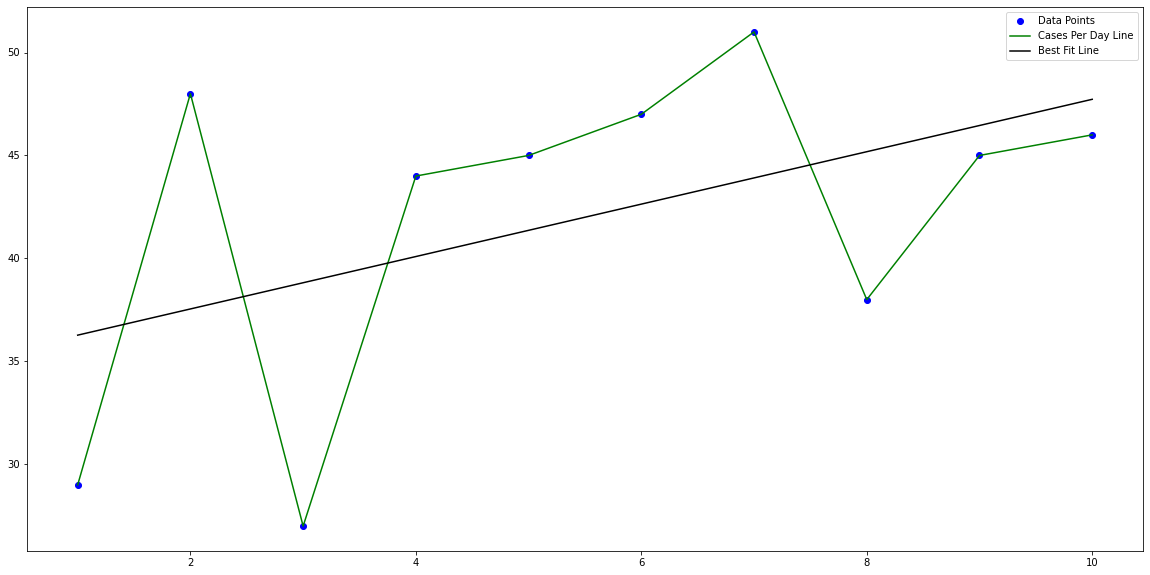

'Best Fit Line Equation: y = 1.3*t + 35.0.'

In [83]:
# A line graph showing the changes between the number of cases per time period. Will be updated in time.
# The black line is used to estimate the number of cases for the next day. 
# Below the graph is the best fit line equation.

lgraph(cvbc08)

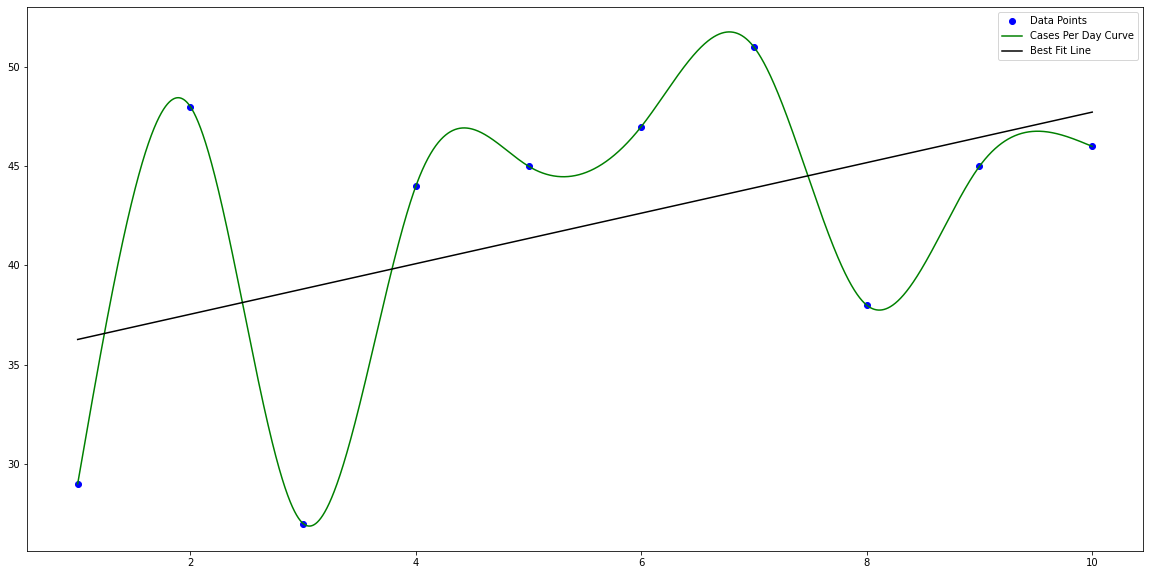

'Best Fit Line Equation: y = 1.3*t + 35.0.'

In [84]:
# A more aesthetically pleasing way to plot the cases per time period. Will be updated in time. 
# The black line is used to estimate the number of cases for the next day.
# Below the graph is the best fit line equation.

spline(cvbc08)

In [85]:
good_line(cvbc08)

Correlation coefficient is 0.48. This line is an okay fit for the data.


In [86]:
next_tp(cvbc08)

47

In [109]:
prob(cvus08,55000,100000)

45.04

+0.25 Standard Deviations = 55585.0
+0.5 Standard Deviations = 56752.0
+0.75 Standard Deviations = 57919.0
+1 Standard Deviations = 59086.0
+1.5 Standard Deviations = 61420.0
+2 Standard Deviations = 63753.0


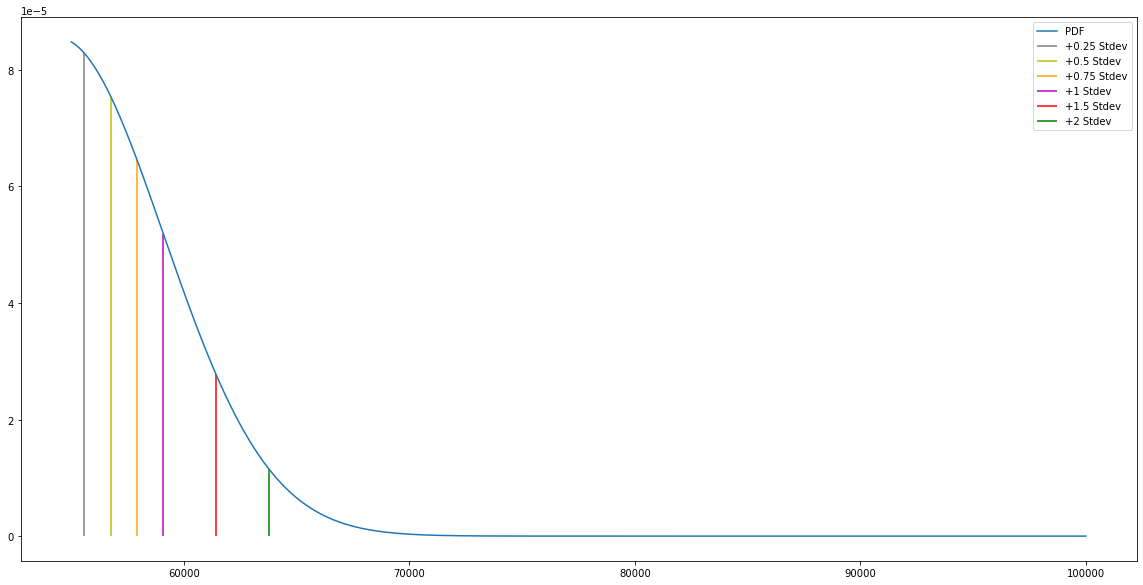

In [108]:
graph_next_tp(cvus08,55000,100000)

# A visualization of the range of cases for the next time period. The black line evenly divides the curve. 
# 50% of the curve lies left of the black line, and 50% lies right of it. Standard deviation values may 
# differ from the graph's data due to rounding for simplicity.